In [6]:
import pandas as pd
import pycaret.classification as clf
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
import matplotlib.pyplot as plt


rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  

In [5]:
real_df = pd.read_csv('생성데이터/RFM/6. 3분기별로 모든 피처 데이터/Real_concat_df.csv', index_col = 0)
real_df

,성별,연령대_5세,연령대_10세,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,전반기_횟수별_중요 카테고리 top_1_식품/생활_고가,전반기_횟수별_중요 카테고리 top_1_식품/생활_저가,전반기_횟수별_중요 카테고리 top_1_식품/생활_중가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,전반기_횟수별_중요 카테고리 top_1_침구/주방_고가,전반기_횟수별_중요 카테고리 top_1_침구/주방_저가,전반기_횟수별_중요 카테고리 top_1_침구/주방_중가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,전반기_금액별_중요 카테고리 top_1_식품/생활_고가,전반기_금액별_중요 카테고리 top_1_식품/생활_저가,전반기_금액별_중요 카테고리 top_1_식품/생활_중가,전반기_금액별_중요 카테고리 top_1_의류/이미용_고가,전반기_금액별_중요 카테고리 top_1_의류/이미용_저가,전반기_금액별_중요 카테고리 top_1_의류/이미용_중가,전반기_금액별_중요 카테고리 top_1_침구/주방_고가,전반기_금액별_중요 카테고리 top_1_침구/주방_저가,전반기_금액별_중요 카테고리 top_1_침구/주방_중가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,중반기_횟수별_중요 카테고리 top_1_식품/생활_고가,중반기_횟수별_중요 카테고리 top_1_식품/생활_저가,중반기_횟수별_중요 카테고리 top_1_식품/생활_중가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,중반기_횟수별_중요 카테고리 top_1_침구/주방_고가,중반기_횟수별_중요 카테고리 top_1_침구/주방_저가,중반기_횟수별_중요 카테고리 top_1_침구/주방_중가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,중반기_금액별_중요 카테고리 top_1_식품/생활_고가,중반기_금액별_중요 카테고리 top_1_식품/생활_저가,중반기_금액별_중요 카테고리 top_1_식품/생활_중가,중반기_금액별_중요 카테고리 top_1_의류/이미용_고가,중반기_금액별_중요 카테고리 top_1_의류/이미용_저가,중반기_금액별_중요 카테고리 top_1_의류/이미용_중가,중반기_금액별_중요 카테고리 top_1_침구/주방_고가,중반기_금액별_중요 카테고리 top_1_침구/주방_저가,중반기_금액별_중요 카테고리 top_1_침구/주방_중가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,후반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,후반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,후반기_횟수별_중요 카테고리 top_1_식품/생활_고가,후반기_횟수별_중요 카테고리 top_1_식품/생활_저가,후반기_횟수별_중요 카테고리 top_1_식품/생활_중가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,후반기_횟수별_중요 카테고리 top_1_침구/주방_고가,후반기_횟수별_중요 카테고리 top_1_침구/주방_저가,후반기_횟수별_중요 카테고리 top_1_침구/주방_중가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,후반기_금액별_중요 카테고리 top_1_식품/생활_고가,후반기_금액별_중요 카테고리 top_1_식품/생활_저가,후반기_금액별_중요 카테고리 top_1_식품/생활_중가,후반기_금액별_중요 카테고리 top_1_의류/이미용_고가,후반기_금액별_중요 카테고리 top_1_의류/이미용_저가,후반기_금액별_중요 카테고리 top_1_의류/이미용_중가,후반기_금액별_중요 카테고리 top_1_침구/주방_고가,후반기_금액별_중요 카테고리 top_1_침구/주방_저가,후반기_금액별_중요 카테고리 top_1_침구/주방_중가,사치품_구매횟수 등급,일용품_구매횟수 등급,선매품_구매횟수 등급,사치품_구매액 등급,일용품_구매액 등급,선매품_구매액 등급,전체_구매횟수 등급,전체_구매액 등급,Engel_PURAMT,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Freq

In [6]:
real_df.columns[80:150]

Index(['후반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가', '후반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가',
       '후반기_횟수별_중요 카테고리 top_1_식품/생활_고가', '후반기_횟수별_중요 카테고리 top_1_식품/생활_저가',
       '후반기_횟수별_중요 카테고리 top_1_식품/생활_중가', '후반기_횟수별_중요 카테고리 top_1_의류/이미용_고가',
       '후반기_횟수별_중요 카테고리 top_1_의류/이미용_저가', '후반기_횟수별_중요 카테고리 top_1_의류/이미용_중가',
       '후반기_횟수별_중요 카테고리 top_1_침구/주방_고가', '후반기_횟수별_중요 카테고리 top_1_침구/주방_저가',
       '후반기_횟수별_중요 카테고리 top_1_침구/주방_중가', '후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가',
       '후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가',
       '후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가',
       '후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가',
       '후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가',
       '후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가',
       '후반기_금액별_중요 카테고리 top_1_교육문화/아동_고가', '후반기_금액별_중요 카테고리 top_1_교육문화/아동_저가',
       '후반기_금액별_중요 카테고리 top_1_교육문화/아동_중가', '후반기_금액별_중요 카테고리 top_1_식품/생활_고가',
       '후반기_금액별_중요 카테고리 top_1_식품/생활_저가', '후반기_금액별_중요 카테고리 top_1_식품/생활_중가',
       '후반기_금액별_중요 카테고리 top_1_의류/이미용_고가', '후반기_금액별_중요 카테고리 top_1_의류/이미용_저가',


In [7]:
real_df_ = real_df.drop(['주말', '평일', 'label', 'purchase_sum_단순증감여부', 'change_purchase_sum', '사치품_구매횟수 등급', '일용품_구매횟수 등급', '선매품_구매횟수 등급', '사치품_구매액 등급', '일용품_구매액 등급',
       '선매품_구매액 등급', '전체_구매횟수 등급', '전체_구매액 등급'], axis = 1)
real_df_

,성별,연령대_5세,연령대_10세,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,전반기_횟수별_중요 카테고리 top_1_식품/생활_고가,전반기_횟수별_중요 카테고리 top_1_식품/생활_저가,전반기_횟수별_중요 카테고리 top_1_식품/생활_중가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,전반기_횟수별_중요 카테고리 top_1_침구/주방_고가,전반기_횟수별_중요 카테고리 top_1_침구/주방_저가,전반기_횟수별_중요 카테고리 top_1_침구/주방_중가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,전반기_금액별_중요 카테고리 top_1_식품/생활_고가,전반기_금액별_중요 카테고리 top_1_식품/생활_저가,전반기_금액별_중요 카테고리 top_1_식품/생활_중가,전반기_금액별_중요 카테고리 top_1_의류/이미용_고가,전반기_금액별_중요 카테고리 top_1_의류/이미용_저가,전반기_금액별_중요 카테고리 top_1_의류/이미용_중가,전반기_금액별_중요 카테고리 top_1_침구/주방_고가,전반기_금액별_중요 카테고리 top_1_침구/주방_저가,전반기_금액별_중요 카테고리 top_1_침구/주방_중가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,중반기_횟수별_중요 카테고리 top_1_식품/생활_고가,중반기_횟수별_중요 카테고리 top_1_식품/생활_저가,중반기_횟수별_중요 카테고리 top_1_식품/생활_중가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,중반기_횟수별_중요 카테고리 top_1_침구/주방_고가,중반기_횟수별_중요 카테고리 top_1_침구/주방_저가,중반기_횟수별_중요 카테고리 top_1_침구/주방_중가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,중반기_금액별_중요 카테고리 top_1_식품/생활_고가,중반기_금액별_중요 카테고리 top_1_식품/생활_저가,중반기_금액별_중요 카테고리 top_1_식품/생활_중가,중반기_금액별_중요 카테고리 top_1_의류/이미용_고가,중반기_금액별_중요 카테고리 top_1_의류/이미용_저가,중반기_금액별_중요 카테고리 top_1_의류/이미용_중가,중반기_금액별_중요 카테고리 top_1_침구/주방_고가,중반기_금액별_중요 카테고리 top_1_침구/주방_저가,중반기_금액별_중요 카테고리 top_1_침구/주방_중가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,후반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,후반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,후반기_횟수별_중요 카테고리 top_1_식품/생활_고가,후반기_횟수별_중요 카테고리 top_1_식품/생활_저가,후반기_횟수별_중요 카테고리 top_1_식품/생활_중가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,후반기_횟수별_중요 카테고리 top_1_침구/주방_고가,후반기_횟수별_중요 카테고리 top_1_침구/주방_저가,후반기_횟수별_중요 카테고리 top_1_침구/주방_중가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,후반기_금액별_중요 카테고리 top_1_식품/생활_고가,후반기_금액별_중요 카테고리 top_1_식품/생활_저가,후반기_금액별_중요 카테고리 top_1_식품/생활_중가,후반기_금액별_중요 카테고리 top_1_의류/이미용_고가,후반기_금액별_중요 카테고리 top_1_의류/이미용_저가,후반기_금액별_중요 카테고리 top_1_의류/이미용_중가,후반기_금액별_중요 카테고리 top_1_침구/주방_고가,후반기_금액별_중요 카테고리 top_1_침구/주방_저가,후반기_금액별_중요 카테고리 top_1_침구/주방_중가,Engel_PURAMT,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가,주말 비율,Recency_rank가구인테리어/잡화_고가,Recency_rank가구인테리어/잡화_저가,Recency_rank가구인테리어/

In [8]:
real_df_.columns[3:109]

Index(['전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가',
       '전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가',
       '전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가',
       '전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가',
       '전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가',
       '전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가',
       '전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가', '전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가',
       '전반기_횟수별_중요 카테고리 top_1_식품/생활_고가', '전반기_횟수별_중요 카테고리 top_1_식품/생활_저가',
       ...
       '후반기_금액별_중요 카테고리 top_1_교육문화/아동_중가', '후반기_금액별_중요 카테고리 top_1_식품/생활_고가',
       '후반기_금액별_중요 카테고리 top_1_식품/생활_저가', '후반기_금액별_중요 카테고리 top_1_식품/생활_중가',
       '후반기_금액별_중요 카테고리 top_1_의류/이미용_고가', '후반기_금액별_중요 카테고리 top_1_의류/이미용_저가',
       '후반기_금액별_중요 카테고리 top_1_의류/이미용_중가', '후반기_금액별_중요 카테고리 top_1_침구/주방_고가',
       '후반기_금액별_중요 카테고리 top_1_침구/주방_저가', '후반기_금액별_중요 카테고리 top_1_침구/주방_중가'],
      dtype='object', length=106)

In [9]:
real_df_.columns[129:149]

Index(['Recency_rank가구인테리어/잡화_고가', 'Recency_rank가구인테리어/잡화_저가',
       'Recency_rank가구인테리어/잡화_중가', 'Recency_rank가전/레저취미/멀티샵_고가',
       'Recency_rank가전/레저취미/멀티샵_저가', 'Recency_rank가전/레저취미/멀티샵_중가',
       'Recency_rank교육문화/아동_고가', 'Recency_rank교육문화/아동_저가',
       'Recency_rank교육문화/아동_중가', 'Recency_rank식품/생활_고가',
       'Recency_rank식품/생활_저가', 'Recency_rank식품/생활_중가', 'Recency_rank의류/이미용_고가',
       'Recency_rank의류/이미용_저가', 'Recency_rank의류/이미용_중가',
       'Recency_rank침구/주방_고가', 'Recency_rank침구/주방_저가', 'Recency_rank침구/주방_중가',
       '전반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가',
       '후반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가'],
      dtype='object')

In [10]:
len(real_df_.columns[129:149])

20

In [11]:
len(real_df_.columns[3:109])

106

In [12]:
category_ = real_df_.columns[3:109].tolist() + real_df_.columns[129:149].tolist() + ['성별', '연령대_5세', '연령대_10세']

In [13]:
category_df = real_df_.copy()

In [14]:
category_df[category_] = category_df[category_].astype('int')

In [15]:
category_df[category_] = category_df[category_].astype('category')

In [16]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94330 entries, 1 to 19337
Columns: 204 entries, 성별 to Monetary_침구/주방_중가
dtypes: category(129), float64(38), int64(37)
memory usage: 66.3 MB


In [17]:
category_df

,성별,연령대_5세,연령대_10세,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,전반기_횟수별_중요 카테고리 top_1_식품/생활_고가,전반기_횟수별_중요 카테고리 top_1_식품/생활_저가,전반기_횟수별_중요 카테고리 top_1_식품/생활_중가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,전반기_횟수별_중요 카테고리 top_1_침구/주방_고가,전반기_횟수별_중요 카테고리 top_1_침구/주방_저가,전반기_횟수별_중요 카테고리 top_1_침구/주방_중가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,전반기_금액별_중요 카테고리 top_1_식품/생활_고가,전반기_금액별_중요 카테고리 top_1_식품/생활_저가,전반기_금액별_중요 카테고리 top_1_식품/생활_중가,전반기_금액별_중요 카테고리 top_1_의류/이미용_고가,전반기_금액별_중요 카테고리 top_1_의류/이미용_저가,전반기_금액별_중요 카테고리 top_1_의류/이미용_중가,전반기_금액별_중요 카테고리 top_1_침구/주방_고가,전반기_금액별_중요 카테고리 top_1_침구/주방_저가,전반기_금액별_중요 카테고리 top_1_침구/주방_중가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,중반기_횟수별_중요 카테고리 top_1_식품/생활_고가,중반기_횟수별_중요 카테고리 top_1_식품/생활_저가,중반기_횟수별_중요 카테고리 top_1_식품/생활_중가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,중반기_횟수별_중요 카테고리 top_1_침구/주방_고가,중반기_횟수별_중요 카테고리 top_1_침구/주방_저가,중반기_횟수별_중요 카테고리 top_1_침구/주방_중가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,중반기_금액별_중요 카테고리 top_1_식품/생활_고가,중반기_금액별_중요 카테고리 top_1_식품/생활_저가,중반기_금액별_중요 카테고리 top_1_식품/생활_중가,중반기_금액별_중요 카테고리 top_1_의류/이미용_고가,중반기_금액별_중요 카테고리 top_1_의류/이미용_저가,중반기_금액별_중요 카테고리 top_1_의류/이미용_중가,중반기_금액별_중요 카테고리 top_1_침구/주방_고가,중반기_금액별_중요 카테고리 top_1_침구/주방_저가,중반기_금액별_중요 카테고리 top_1_침구/주방_중가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,후반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,후반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,후반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가,후반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,후반기_횟수별_중요 카테고리 top_1_식품/생활_고가,후반기_횟수별_중요 카테고리 top_1_식품/생활_저가,후반기_횟수별_중요 카테고리 top_1_식품/생활_중가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,후반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,후반기_횟수별_중요 카테고리 top_1_침구/주방_고가,후반기_횟수별_중요 카테고리 top_1_침구/주방_저가,후반기_횟수별_중요 카테고리 top_1_침구/주방_중가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,후반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,후반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,후반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,후반기_금액별_중요 카테고리 top_1_식품/생활_고가,후반기_금액별_중요 카테고리 top_1_식품/생활_저가,후반기_금액별_중요 카테고리 top_1_식품/생활_중가,후반기_금액별_중요 카테고리 top_1_의류/이미용_고가,후반기_금액별_중요 카테고리 top_1_의류/이미용_저가,후반기_금액별_중요 카테고리 top_1_의류/이미용_중가,후반기_금액별_중요 카테고리 top_1_침구/주방_고가,후반기_금액별_중요 카테고리 top_1_침구/주방_저가,후반기_금액별_중요 카테고리 top_1_침구/주방_중가,Engel_PURAMT,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가,주말 비율,Recency_rank가구인테리어/잡화_고가,Recency_rank가구인테리어/잡화_저가,Recency_rank가구인테리어/

## 연령대 5세만 넣기

In [18]:
new_age_5 = clf
new_df_ = new_age_5.setup(data=category_df.drop(['연령대_10세'], axis = 1),
                   target='change_label',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,7565
1,Target,change_label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(94330, 203)"
5,Missing Values,False
6,Numeric Features,38
7,Categorical Features,164
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
# 모델 객체 다 돌리기
new_age5_model = new_age_5.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7177,0.7936,0.7165,0.7153,0.7159,0.4353,0.4353,1.2600
xgboost,Extreme Gradient Boosting,0.7092,0.7842,0.6971,0.7114,0.7042,0.4184,0.4185,26.7480
gbc,Gradient Boosting Classifier,0.7066,0.7791,0.6949,0.7084,0.7016,0.4130,0.4131,23.9380
rf,Random Forest Classifier,0.6952,0.7648,0.7018,0.6897,0.6957,0.3905,0.3906,7.3040
ada,Ada Boost Classifier,0.6927,0.7583,0.6638,0.7012,0.6820,0.3851,0.3857,5.3260
ridge,Ridge Classifier,0.6924,0.0000,0.6656,0.7001,0.6824,0.3846,0.3851,0.3840
lda,Linear Discriminant Analysis,0.6924,0.7620,0.6656,0.7001,0.6823,0.3845,0.3850,4.7040
lr,Logistic Regression,0.6805,0.7374,0.6407,0.6927,0.6657,0.3607,0.3617,4.5080
et,Extra Trees Classifier,0.6794,0.7444,0.6724,0.6788,0.6756,0.3588,0.3588,12.8000
knn,K Neighbors Classifier,0.6703,0.7191,0.6532,0.6730,0.6629,0.3404,0.3405,82.7900


In [20]:
# 최적의 모델 찾아주기
best_model_age5 = new_age_5.tune_model(new_age5_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7200,0.7964,0.7177,0.7181,0.7179,0.4400,0.4400
1,0.7227,0.7953,0.7195,0.7212,0.7203,0.4453,0.4453
2,0.7145,0.7902,0.7052,0.7156,0.7103,0.4289,0.4290
3,0.7128,0.7892,0.7117,0.7104,0.7110,0.4257,0.4257
4,0.7181,0.7918,0.7089,0.7193,0.7140,0.4362,0.4362
Mean,0.7176,0.7926,0.7126,0.7169,0.7147,0.4352,0.4352
Std,0.0036,0.0028,0.0054,0.0037,0.0039,0.0071,0.0071


In [21]:
# 최적의 모델로 학습한 결과 시각화
new_age_5.evaluate_model(best_model_age5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
# # 모델 저장
new_age_5.save_model(best_model_age5 , 'new_age_5_pipeline_plus_monetary')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='change_label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 colsample_bytree=1.0, feature_fraction=0.7,
                                 importance_type='split', learning_rate=0.15,
                                 max_depth=-1, min_child_samples=51,
           

## 2. 연령대 10세만 넣기

In [55]:
new_age_10 = clf
new_df_10 = new_age_10.setup(data=category_df.drop(['연령대_5세'], axis = 1),
                   target='change_label',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,8060
1,Target,change_label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(94330, 203)"
5,Missing Values,False
6,Numeric Features,38
7,Categorical Features,164
8,Ordinal Features,False
9,High Cardinality Features,False


In [56]:
# 모델 객체 다 돌리기
new_age10_model = new_age_10.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7188,0.7954,0.7191,0.7158,0.7174,0.4376,0.4376,1.2780
xgboost,Extreme Gradient Boosting,0.7129,0.7866,0.7005,0.7153,0.7078,0.4257,0.4258,27.4460
gbc,Gradient Boosting Classifier,0.7072,0.7806,0.6962,0.7088,0.7024,0.4143,0.4144,24.5180
rf,Random Forest Classifier,0.6974,0.7669,0.7039,0.6919,0.6979,0.3949,0.3950,7.4800
ridge,Ridge Classifier,0.6943,0.0000,0.6674,0.7021,0.6843,0.3884,0.3889,0.8520
lda,Linear Discriminant Analysis,0.6942,0.7645,0.6673,0.7019,0.6842,0.3881,0.3886,4.8400
ada,Ada Boost Classifier,0.6922,0.7599,0.6640,0.7004,0.6817,0.3842,0.3847,8.6180
et,Extra Trees Classifier,0.6811,0.7461,0.6758,0.6800,0.6779,0.3622,0.3623,13.0080
lr,Logistic Regression,0.6800,0.7374,0.6396,0.6924,0.6649,0.3597,0.3607,4.2060
knn,K Neighbors Classifier,0.6719,0.7197,0.6535,0.6752,0.6642,0.3437,0.3439,86.9520


In [57]:
# 최적의 모델 찾아주기
best_model_age10 = new_age_10.tune_model(new_age10_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7156,0.7897,0.7175,0.7120,0.7147,0.4313,0.4313
1,0.7181,0.7937,0.7087,0.7194,0.7140,0.4362,0.4363
2,0.7250,0.7992,0.7293,0.7202,0.7247,0.4500,0.4500
3,0.7218,0.7980,0.7232,0.7183,0.7207,0.4436,0.4436
4,0.7177,0.7940,0.7172,0.7151,0.7161,0.4354,0.4354
Mean,0.7197,0.7949,0.7192,0.7170,0.7180,0.4393,0.4393
Std,0.0033,0.0034,0.0069,0.0031,0.0041,0.0066,0.0067


In [58]:
# 최적의 모델로 학습한 결과 시각화
new_age_10.evaluate_model(best_model_age10)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Recency 제외

In [40]:
category_df.columns[129:147]

Index(['Recency_rank가구인테리어/잡화_고가', 'Recency_rank가구인테리어/잡화_저가',
       'Recency_rank가구인테리어/잡화_중가', 'Recency_rank가전/레저취미/멀티샵_고가',
       'Recency_rank가전/레저취미/멀티샵_저가', 'Recency_rank가전/레저취미/멀티샵_중가',
       'Recency_rank교육문화/아동_고가', 'Recency_rank교육문화/아동_저가',
       'Recency_rank교육문화/아동_중가', 'Recency_rank식품/생활_고가',
       'Recency_rank식품/생활_저가', 'Recency_rank식품/생활_중가', 'Recency_rank의류/이미용_고가',
       'Recency_rank의류/이미용_저가', 'Recency_rank의류/이미용_중가',
       'Recency_rank침구/주방_고가', 'Recency_rank침구/주방_저가', 'Recency_rank침구/주방_중가'],
      dtype='object')

In [41]:
drop_recency_ = category_df.drop(category_df.columns[129:147].tolist(), axis=1, inplace = False)
drop_recency_

,성별,연령대_5세,연령대_10세,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,...,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
1,0,10,6,0,0,0,0,0,0,0,...,-54078.466182,-3.711364e+05,12785.903246,56221.943408,3.058030e+05,0.000000,9.076142e+05,6.892597e+05,0.000000e+00,4.419937e+05
2,0,10,6,0,0,0,0,0,0,0,...,5256.693543,-1.747277e+05,0.000000,-388298.274210,-1.315601e+06,0.000000,1.694397e+06,7.918392e+04,0.000000e+00,1.237323e+06
3,0,10,6,0,0,0,0,0,0,0,...,0.000000,1.798610e+03,34956.015311,100036.504559,0.000000e+00,0.000000,-9.722907e-13,0.000000e+00,3.406361e+03,0.000000e+00
4,1,10,6,0,0,0,0,0,0,0,...,0.000000,7.226677e+03,6868.626881,-68906.451417,1.896191e+05,21395.307890,3.405017e+05,5.466848e+04,-1.823045e-13,2.774997e+04
6,1,10,6,0,0,0,0,0,0,0,...,0.000000,1.010756e+05,-41523.054543,10057.709787,2.670115e+05,12289.507777,2.222208e+05,-3.889163e-12,-3.130552e+03,-1.839219e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,3,2,0,0,0,0,0,0,0,...,0.000000,-9.190558e+03,-12539.692239,-282857.467970,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
19334,0,5,3,0,0,0,0,0,0,0,...,47379.162931,-2.164727e+04,-49394.050466,-414549.013266,0.000000e+00,-47477.950873,1.023051e+05,0.000000e+00,-6.147497e+03,0.000000e+00
19335,1,5,3,0,0,0,0,0,0,0,...,62357.999849,-9.938148e+03,-29034.670787,-181163.444264,-9.722907e-13,-122796.163061,-2.806475e+04,0.000000e+00,7.497968e+03,-1.224394e+04
19336,1,5,3,0,0,0,0,0,0,0,...,-42706.623783,1.530667e+05,0.000000,34502.483361,-2.085059e+05,-5274.146390,2.037023e+06,-1.228363e+05,0.000000e+00,9.921772e+04


In [42]:
drop_recency_clf = clf
new_df_ = drop_recency_clf.setup(data=drop_recency_.drop(['연령대_10세'], axis = 1),
                   target='change_label',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,3166
1,Target,change_label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(94330, 185)"
5,Missing Values,False
6,Numeric Features,38
7,Categorical Features,146
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
# 모델 객체 다 돌리기
drop_recency_age_5_model = drop_recency_clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7172,0.7934,0.7157,0.7150,0.7153,0.4344,0.4344,1.0000
xgboost,Extreme Gradient Boosting,0.7115,0.7851,0.6966,0.7149,0.7056,0.4228,0.4230,22.4020
gbc,Gradient Boosting Classifier,0.7071,0.7798,0.6934,0.7098,0.7015,0.4140,0.4141,20.2600
rf,Random Forest Classifier,0.6968,0.7666,0.7020,0.6919,0.6969,0.3937,0.3937,6.5100
ada,Ada Boost Classifier,0.6924,0.7587,0.6622,0.7016,0.6813,0.3846,0.3852,4.3980
ridge,Ridge Classifier,0.6918,0.0000,0.6630,0.7002,0.6811,0.3833,0.3838,0.2880
lda,Linear Discriminant Analysis,0.6918,0.7602,0.6632,0.7002,0.6812,0.3834,0.3839,3.8800
lr,Logistic Regression,0.6812,0.7389,0.6437,0.6925,0.6672,0.3621,0.3630,3.2720
et,Extra Trees Classifier,0.6807,0.7450,0.6720,0.6807,0.6764,0.3614,0.3614,11.7440
knn,K Neighbors Classifier,0.6716,0.7210,0.6523,0.6751,0.6635,0.3429,0.3431,64.0580


In [44]:
# 최적의 모델 찾아주기
best_drop_recency_age_5_model = drop_recency_clf.tune_model(drop_recency_age_5_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7075,0.7824,0.7035,0.7063,0.7049,0.4150,0.4151
1,0.7180,0.7913,0.7049,0.7209,0.7128,0.4359,0.4360
2,0.7195,0.7934,0.7152,0.7185,0.7168,0.4390,0.4390
3,0.7130,0.7871,0.7112,0.7108,0.7110,0.4259,0.4259
4,0.7122,0.7886,0.7046,0.7124,0.7085,0.4243,0.4243
Mean,0.7140,0.7886,0.7079,0.7138,0.7108,0.4280,0.4281
Std,0.0043,0.0038,0.0045,0.0053,0.0040,0.0086,0.0086


In [45]:
# 최적의 모델로 학습한 결과 시각화
drop_recency_clf.evaluate_model(best_drop_recency_age_5_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [46]:
# # 모델 저장
drop_recency_clf.save_model(best_drop_recency_age_5_model , 'best_drop_recency_age_5_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='change_label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=31,
            

# LightGBM으로 다시 돌리기

In [47]:
drop_recency_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94330 entries, 1 to 19337
Columns: 186 entries, 성별 to Monetary_침구/주방_중가
dtypes: category(111), float64(38), int64(37)
memory usage: 64.7 MB


In [68]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X = drop_recency_.drop(['연령대_10세', 'change_label'], axis = 1)
y = drop_recency_['change_label']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3166)
print(X_train.shape, X_test.shape)

# 다시 쪼개기
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 3166)

lgbm_wrapper = LGBMClassifier(n_estimators = 220, learning_rate = 0.1, max_depth = -1, min_child_samples = 31,
                             min_child_weight = 0.001, min_split_gain = 0.7, n_jobs = -1, num_leaves = 6, objective = None, 
                            reg_alpha = 2, reg_lambda = 0.0001, silent = 'warn', subsample = 1.0, subsample_for_bin = 200000, feature_fraction = 1.0,
                              bagging_freq = 6, bagging_fraction = 1.0)

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=200, eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

(75464, 184) (18866, 184)
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	training's binary_logloss: 0.682813	valid_1's binary_logloss: 0.683335
[2]	training's binary_logloss: 0.674151	valid_1's binary_logloss: 0.67524
[3]	training's binary_logloss: 0.666823	valid_1's binary_logloss: 0.668035
[4]	training's binary_logloss: 0.660495	valid_1's binary_logloss: 0.661925
[5]	training's binary_logloss: 0.654912	valid_1's binary_logloss: 0.656586
[6]	training's binary_logloss: 0.650124	valid_1's binary_logloss: 0.652131
[7]	training's binary_logloss: 0.645707	valid_1's binary_logloss: 0.648053
[8]	training's binary_logloss: 0.642048	valid_1's binary_logloss: 0.644478
[9]	training's binary_logl

[125]	training's binary_logloss: 0.552311	valid_1's binary_logloss: 0.561124
[126]	training's binary_logloss: 0.552175	valid_1's binary_logloss: 0.561041
[127]	training's binary_logloss: 0.551997	valid_1's binary_logloss: 0.560874
[128]	training's binary_logloss: 0.551853	valid_1's binary_logloss: 0.560823
[129]	training's binary_logloss: 0.551701	valid_1's binary_logloss: 0.560737
[130]	training's binary_logloss: 0.551495	valid_1's binary_logloss: 0.560519
[131]	training's binary_logloss: 0.551354	valid_1's binary_logloss: 0.560441
[132]	training's binary_logloss: 0.551183	valid_1's binary_logloss: 0.560252
[133]	training's binary_logloss: 0.551043	valid_1's binary_logloss: 0.560178
[134]	training's binary_logloss: 0.550898	valid_1's binary_logloss: 0.560076
[135]	training's binary_logloss: 0.550721	valid_1's binary_logloss: 0.559873
[136]	training's binary_logloss: 0.550578	valid_1's binary_logloss: 0.559777
[137]	training's binary_logloss: 0.550445	valid_1's binary_logloss: 0.559645

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, pred_proba)

print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

[[6882 2647]
 [2752 6585]]
정확도: 0.7138, 정밀도: 0.7133, 재현율: 0.7053, F1: 0.7092, AUC:0.7870


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

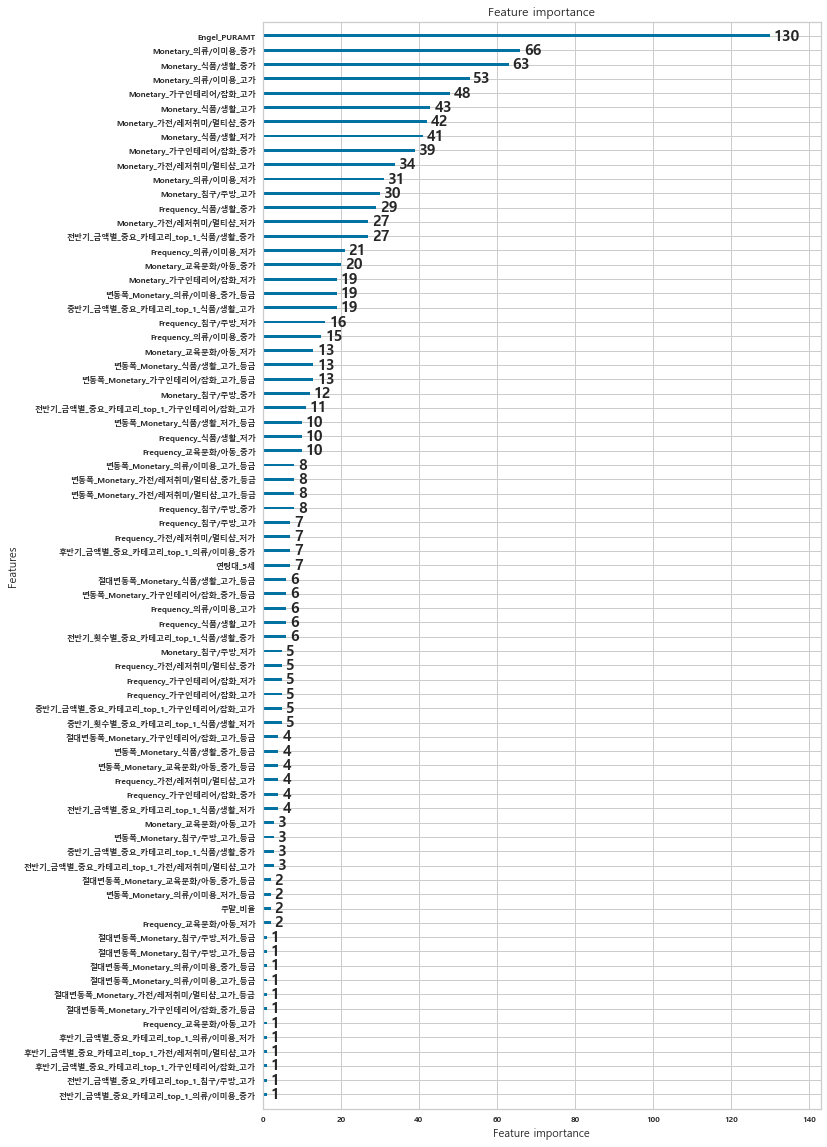

In [70]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
plt.rc('font', size=15, weight="bold")
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plot_importance(lgbm_wrapper, ax=ax)

# engel 지수 제거

In [71]:
drop_engel_clf = clf
new_df_ = drop_engel_clf.setup(data=drop_recency_.drop(['연령대_10세', 'Engel_PURAMT'], axis = 1),
                   target='change_label',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,2601
1,Target,change_label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(94330, 184)"
5,Missing Values,False
6,Numeric Features,37
7,Categorical Features,146
8,Ordinal Features,False
9,High Cardinality Features,False


In [72]:
# 모델 객체 다 돌리기
drop_engel_model = drop_engel_clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7091,0.7844,0.7112,0.7053,0.7083,0.4183,0.4183,1.0880
xgboost,Extreme Gradient Boosting,0.7036,0.7747,0.6913,0.7056,0.6984,0.4071,0.4072,22.9160
gbc,Gradient Boosting Classifier,0.7005,0.7728,0.6857,0.7036,0.6945,0.4010,0.4011,19.6440
rf,Random Forest Classifier,0.6938,0.7631,0.7012,0.6880,0.6946,0.3877,0.3878,6.5200
ridge,Ridge Classifier,0.6880,0.0000,0.6549,0.6980,0.6757,0.3756,0.3764,0.2900
lda,Linear Discriminant Analysis,0.6879,0.7568,0.6548,0.6979,0.6757,0.3756,0.3763,3.9960
ada,Ada Boost Classifier,0.6863,0.7529,0.6516,0.6969,0.6734,0.3723,0.3731,4.3220
et,Extra Trees Classifier,0.6816,0.7452,0.6766,0.6803,0.6784,0.3632,0.3632,11.8820
lr,Logistic Regression,0.6795,0.7368,0.6400,0.6914,0.6647,0.3586,0.3596,3.9120
knn,K Neighbors Classifier,0.6707,0.7188,0.6536,0.6735,0.6634,0.3413,0.3415,72.1200


In [73]:
# 최적의 모델 찾아주기
best_drop_engel_model = drop_engel_clf.tune_model(drop_engel_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7031,0.7766,0.6954,0.7032,0.6993,0.4061,0.4062
1,0.7044,0.7799,0.6905,0.7071,0.6987,0.4086,0.4087
2,0.7069,0.7805,0.6975,0.7078,0.7026,0.4137,0.4137
3,0.7035,0.7735,0.6952,0.7039,0.6995,0.4069,0.4070
4,0.7051,0.7781,0.6954,0.7062,0.7007,0.4102,0.4102
Mean,0.7046,0.7778,0.6948,0.7056,0.7002,0.4091,0.4092
Std,0.0013,0.0025,0.0023,0.0018,0.0014,0.0027,0.0027


In [74]:
# 최적의 모델로 학습한 결과 시각화
drop_engel_clf.evaluate_model(best_drop_engel_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [75]:
# # 모델 저장
drop_engel_clf.save_model(best_drop_engel_model , 'best_drop_engel_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='change_label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.4,
       

# 라이쮸 다시

In [76]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X = drop_recency_.drop(['연령대_10세', 'Engel_PURAMT', 'change_label'], axis = 1)
y = drop_recency_['change_label']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2601)
print(X_train.shape, X_test.shape)

# 다시 쪼개기
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2601)

lgbm_wrapper = LGBMClassifier(n_estimators = 150, colsample_bytree = 1.0, importance_type = 'split',
                              learning_rate = 0.4, max_depth = -1, min_child_samples = 86,
                             min_child_weight = 0.001, min_split_gain = 0.8, n_jobs = -1, num_leaves = 4, objective = None, 
                            reg_alpha = 0.3, reg_lambda = 0.1, silent = 'warn', subsample = 1.0, subsample_for_bin = 200000, feature_fraction = 1.0,
                              bagging_freq = 0, bagging_fraction = 0.9)

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=200, eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

(75464, 183) (18866, 183)
[1]	training's binary_logloss: 0.662847	valid_1's binary_logloss: 0.663494
[2]	training's binary_logloss: 0.647088	valid_1's binary_logloss: 0.648102
[3]	training's binary_logloss: 0.636877	valid_1's binary_logloss: 0.6388
[4]	training's binary_logloss: 0.628698	valid_1's binary_logloss: 0.630962
[5]	training's binary_logloss: 0.622446	valid_1's binary_logloss: 0.62448
[6]	training's binary_logloss: 0.616925	valid_1's binary_logloss: 0.61922
[7]	training's binary_logloss: 0.611865	valid_1's binary_logloss: 0.614347
[8]	training's binary_logloss: 0.607764	valid_1's binary_logloss: 0.610209
[9]	training's binary_logloss: 0.604402	valid_1's binary_logloss: 0.607383
[10]	training's binary_logloss: 0.601197	valid_1's binary_logloss: 0.604124
[11]	training's binary_logloss: 0.59865	valid_1's binary_logloss: 0.601634
[12]	training's binary_logloss: 0.596283	valid_1's binary_logloss: 0.59989
[13]	training's binary_logloss: 0.594386	valid_1's binary_logloss: 0.597724
[

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, pred_proba)

print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

[[6735 2773]
 [2722 6636]]
정확도: 0.7087, 정밀도: 0.7053, 재현율: 0.7091, F1: 0.7072, AUC:0.7805


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

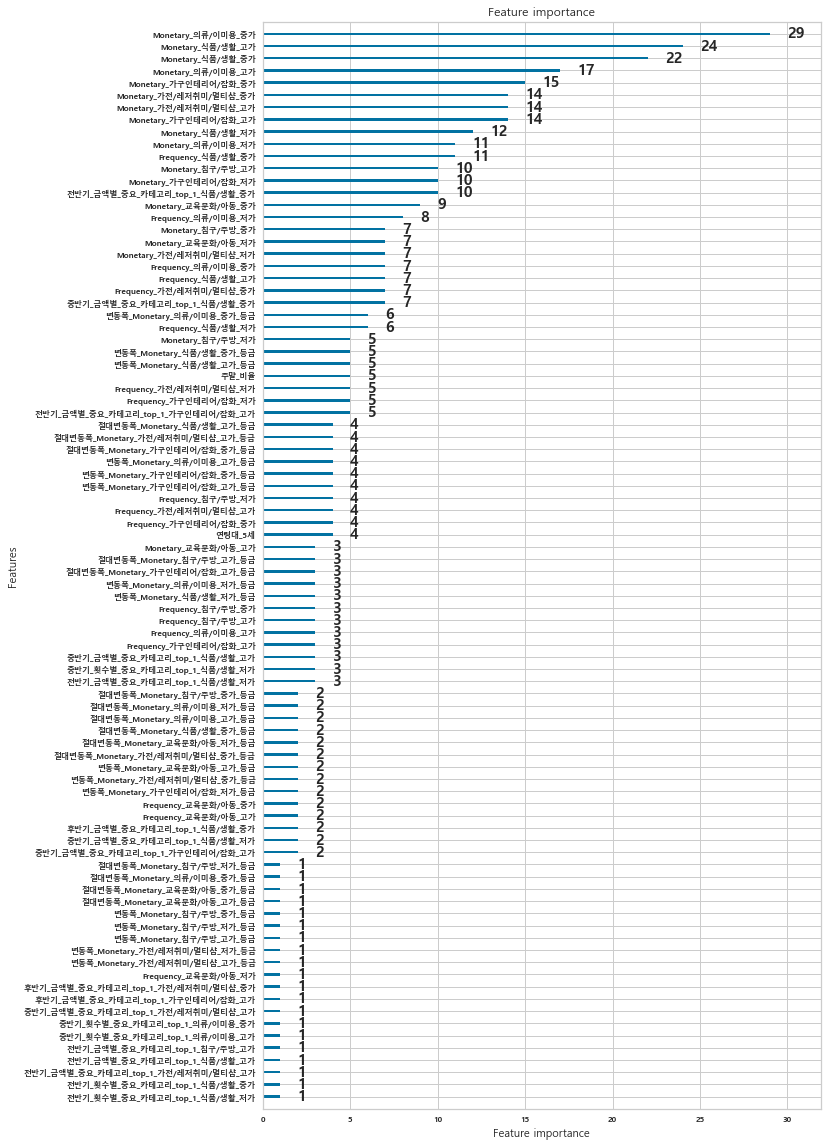

In [78]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
plt.rc('font', size=15, weight="bold")
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plot_importance(lgbm_wrapper, ax=ax)

# 엥겔 변경

In [80]:
change_engel = pd.read_csv('생성데이터/engel/concat_q1_q7.csv', index_col = 0)
change_engel

,total_engel
CUSTNO,
1,0.193826
2,0.183793
3,0.881386
4,0.282455
6,0.386187
...,...
19333,1.000000
19334,0.549980
19335,0.398852


In [81]:
drop_recency_['Engel_PURAMT'] = change_engel['total_engel']

In [82]:
change_engel_clf = clf
new_df_ = change_engel_clf.setup(data=drop_recency_.drop(['연령대_10세'], axis = 1),
                   target='change_label',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,892
1,Target,change_label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(94330, 185)"
5,Missing Values,False
6,Numeric Features,38
7,Categorical Features,146
8,Ordinal Features,False
9,High Cardinality Features,False


In [83]:
# 모델 객체 다 돌리기
change_engel_model = change_engel_clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7097,0.7835,0.7106,0.7063,0.7085,0.4193,0.4193,1.2160
xgboost,Extreme Gradient Boosting,0.7035,0.7750,0.6943,0.7043,0.6993,0.4070,0.4070,22.3160
gbc,Gradient Boosting Classifier,0.6998,0.7721,0.6870,0.7019,0.6944,0.3995,0.3996,20.9760
rf,Random Forest Classifier,0.6941,0.7632,0.7024,0.6880,0.6951,0.3883,0.3884,6.5320
ada,Ada Boost Classifier,0.6869,0.7511,0.6550,0.6963,0.6750,0.3736,0.3742,4.6800
ridge,Ridge Classifier,0.6850,0.0000,0.6534,0.6941,0.6731,0.3696,0.3703,0.7540
lda,Linear Discriminant Analysis,0.6850,0.7552,0.6533,0.6941,0.6731,0.3696,0.3703,3.6960
lr,Logistic Regression,0.6807,0.7374,0.6424,0.6922,0.6663,0.3610,0.3619,37.8800
et,Extra Trees Classifier,0.6791,0.7438,0.6740,0.6778,0.6759,0.3582,0.3582,11.5460
knn,K Neighbors Classifier,0.6714,0.7193,0.6561,0.6735,0.6646,0.3426,0.3427,73.7740


In [84]:
# 최적의 모델 찾아주기
best_change_engel_model = change_engel_clf.tune_model(change_engel_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7064,0.7812,0.7084,0.7026,0.7055,0.4128,0.4129
1,0.7123,0.7881,0.7154,0.7080,0.7117,0.4245,0.4245
2,0.7119,0.7841,0.7071,0.7110,0.7090,0.4237,0.4237
3,0.7113,0.7832,0.7120,0.7080,0.7100,0.4225,0.4225
4,0.7085,0.7808,0.7084,0.7055,0.7069,0.4169,0.4169
Mean,0.7100,0.7835,0.7102,0.7070,0.7086,0.4201,0.4201
Std,0.0022,0.0026,0.0031,0.0028,0.0022,0.0045,0.0045


In [85]:
# 최적의 모델로 학습한 결과 시각화
change_engel_clf.evaluate_model(best_change_engel_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [86]:
# # 모델 저장
change_engel_clf.save_model(best_change_engel_model , 'best_change_engel_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='change_label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=51,
            

# 성별 제외

In [87]:
drop_female_clf = clf
new_df_ = change_engel_clf.setup(data=drop_recency_.drop(['연령대_10세', '성별'], axis = 1),
                   target='change_label',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,1565
1,Target,change_label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(94330, 184)"
5,Missing Values,False
6,Numeric Features,38
7,Categorical Features,145
8,Ordinal Features,False
9,High Cardinality Features,False


In [88]:
# 모델 객체 다 돌리기
change_drop_female_model = drop_female_clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7117,0.7848,0.7146,0.7076,0.7110,0.4234,0.4234,1.1620
xgboost,Extreme Gradient Boosting,0.7057,0.7749,0.6955,0.7069,0.7011,0.4113,0.4113,23.0860
gbc,Gradient Boosting Classifier,0.7024,0.7730,0.6913,0.7039,0.6976,0.4047,0.4048,20.2640
rf,Random Forest Classifier,0.6962,0.7640,0.7035,0.6904,0.6968,0.3924,0.3924,6.4920
ridge,Ridge Classifier,0.6880,0.0000,0.6545,0.6982,0.6756,0.3758,0.3765,0.3500
lda,Linear Discriminant Analysis,0.6880,0.7560,0.6543,0.6982,0.6756,0.3757,0.3764,4.2140
ada,Ada Boost Classifier,0.6856,0.7523,0.6515,0.6958,0.6729,0.3709,0.3716,4.4920
et,Extra Trees Classifier,0.6811,0.7449,0.6784,0.6789,0.6787,0.3622,0.3622,12.1680
lr,Logistic Regression,0.6803,0.7374,0.6431,0.6913,0.6663,0.3602,0.3611,4.1580
knn,K Neighbors Classifier,0.6709,0.7194,0.6532,0.6739,0.6634,0.3416,0.3418,69.2740


In [89]:
# 최적의 모델 찾아주기
best_drop_female_model = drop_female_clf.tune_model(change_drop_female_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7036,0.7782,0.7137,0.6966,0.7050,0.4072,0.4073
1,0.7156,0.7890,0.7136,0.7136,0.7136,0.4312,0.4312
2,0.7170,0.7899,0.7269,0.7100,0.7184,0.4341,0.4342
3,0.7144,0.7893,0.7128,0.7121,0.7125,0.4287,0.4287
4,0.7057,0.7799,0.7080,0.7018,0.7049,0.4114,0.4114
Mean,0.7113,0.7852,0.7150,0.7068,0.7109,0.4225,0.4226
Std,0.0055,0.0051,0.0063,0.0065,0.0052,0.0110,0.0110


In [90]:
# 최적의 모델로 학습한 결과 시각화
drop_female_clf.evaluate_model(best_drop_female_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [91]:
# # 모델 저장
drop_female_clf.save_model(best_drop_female_model , 'best_drop_female_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='change_label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.05,
                                 max_depth=-1, min_child_samples=16,
           

# 라이쮸 최종_6-8분기 제외 후 모델 학습

In [143]:
drop_recency_.drop(['연령대_10세', '성별', 'change_label'], axis = 1).iloc[:-18866]

,연령대_5세,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,전반기_횟수별_중요 카테고리 top_1_식품/생활_고가,...,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
1,10,0,0,0,0,0,0,0,0,0,...,-5.407847e+04,-371136.448141,12785.903246,56221.943408,3.058030e+05,0.000000e+00,9.076142e+05,6.892597e+05,0.000000e+00,4.419937e+05
2,10,0,0,0,0,0,0,0,0,0,...,5.256694e+03,-174727.677234,0.000000,-388298.274210,-1.315601e+06,0.000000e+00,1.694397e+06,7.918392e+04,0.000000e+00,1.237323e+06
3,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,1798.609951,34956.015311,100036.504559,0.000000e+00,0.000000e+00,-9.722907e-13,0.000000e+00,3.406361e+03,0.000000e+00
4,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,7226.676849,6868.626881,-68906.451417,1.896191e+05,2.139531e+04,3.405017e+05,5.466848e+04,-1.823045e-13,2.774997e+04
6,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,101075.568309,-41523.054543,10057.709787,2.670115e+05,1.228951e+04,2.222208e+05,-3.889163e-12,-3.130552e+03,-1.839219e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,3,0,0,0,0,0,0,0,0,0,...,0.000000e+00,10149.800903,-9038.872041,41283.734786,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
19334,5,0,0,0,0,0,0,0,0,0,...,-2.121286e+04,-22809.759754,-341316.815863,-585921.068385,0.000000e+00,2.991617e+04,0.000000e+00,0.000000e+00,-5.555341e+04,0.000000e+00
19335,5,0,0,0,0,0,0,0,0,0,...,2.211815e+04,43563.219341,-17777.773312,-116514.850367,7.055933e+03,-3.776916e+03,-1.458436e-12,0.000000e+00,5.168212e+03,-2.231344e+04
19336,5,0,0,0,0,0,0,0,0,0,...,-5.833744e-12,-48947.619359,0.000000,-212159.528466,-7.545684e+05,-6.076817e-13,1.654196e+05,3.889163e-12,0.000000e+00,0.000000e+00


In [290]:
drop_recency_train = drop_recency_.drop(['연령대_10세', '성별', 'change_label'], axis = 1).iloc[:-18866]
drop_recency_train

,연령대_5세,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,전반기_횟수별_중요 카테고리 top_1_식품/생활_고가,...,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
1,10,0,0,0,0,0,0,0,0,0,...,-5.407847e+04,-371136.448141,12785.903246,56221.943408,3.058030e+05,0.000000e+00,9.076142e+05,6.892597e+05,0.000000e+00,4.419937e+05
2,10,0,0,0,0,0,0,0,0,0,...,5.256694e+03,-174727.677234,0.000000,-388298.274210,-1.315601e+06,0.000000e+00,1.694397e+06,7.918392e+04,0.000000e+00,1.237323e+06
3,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,1798.609951,34956.015311,100036.504559,0.000000e+00,0.000000e+00,-9.722907e-13,0.000000e+00,3.406361e+03,0.000000e+00
4,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,7226.676849,6868.626881,-68906.451417,1.896191e+05,2.139531e+04,3.405017e+05,5.466848e+04,-1.823045e-13,2.774997e+04
6,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,101075.568309,-41523.054543,10057.709787,2.670115e+05,1.228951e+04,2.222208e+05,-3.889163e-12,-3.130552e+03,-1.839219e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,3,0,0,0,0,0,0,0,0,0,...,0.000000e+00,10149.800903,-9038.872041,41283.734786,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
19334,5,0,0,0,0,0,0,0,0,0,...,-2.121286e+04,-22809.759754,-341316.815863,-585921.068385,0.000000e+00,2.991617e+04,0.000000e+00,0.000000e+00,-5.555341e+04,0.000000e+00
19335,5,0,0,0,0,0,0,0,0,0,...,2.211815e+04,43563.219341,-17777.773312,-116514.850367,7.055933e+03,-3.776916e+03,-1.458436e-12,0.000000e+00,5.168212e+03,-2.231344e+04
19336,5,0,0,0,0,0,0,0,0,0,...,-5.833744e-12,-48947.619359,0.000000,-212159.528466,-7.545684e+05,-6.076817e-13,1.654196e+05,3.889163e-12,0.000000e+00,0.000000e+00


In [291]:
drop_recency_test = drop_recency_.drop(['연령대_10세', '성별', 'change_label'], axis = 1).iloc[-18866:]
drop_recency_test

,연령대_5세,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,전반기_횟수별_중요 카테고리 top_1_식품/생활_고가,...,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
1,10,0,0,0,0,0,0,0,0,0,...,0.000000,-7.996834e+04,-22083.920277,-473515.025621,-3.915519e+05,0.000000,5.335700e+05,741823.532475,-5707.007387,-150857.956485
2,10,0,0,0,0,0,0,0,0,0,...,-499669.155092,-4.682646e+04,974.535308,-237667.276162,-2.736183e+06,22080.542045,1.698443e+06,-713433.174284,0.000000,49065.127878
3,10,0,0,0,0,0,0,0,0,0,...,0.000000,3.835934e+04,-26618.739397,41658.652252,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4,10,0,0,0,0,0,0,0,0,0,...,0.000000,4.224794e+02,15043.356460,-106554.316854,-2.247306e+04,51475.520678,1.775416e+05,15230.494855,0.000000,0.000000
6,10,0,0,0,0,0,0,0,0,0,...,0.000000,1.724998e+05,-74778.807815,-93875.448017,-8.829397e+04,47339.334292,4.868660e+05,-562376.039222,-8915.519671,-13187.020037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,3,0,0,0,0,0,0,0,0,0,...,0.000000,-9.190558e+03,-12539.692239,-282857.467970,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
19334,5,0,0,0,0,0,0,0,0,0,...,47379.162931,-2.164727e+04,-49394.050466,-414549.013266,0.000000e+00,-47477.950873,1.023051e+05,0.000000,-6147.497355,0.000000
19335,5,0,0,0,0,0,0,0,0,0,...,62357.999849,-9.938148e+03,-29034.670787,-181163.444264,-9.722907e-13,-122796.163061,-2.806475e+04,0.000000,7497.967607,-12243.940317
19336,5,0,0,0,0,0,0,0,0,0,...,-42706.623783,1.530667e+05,0.000000,34502.483361,-2.085059e+05,-5274.146390,2.037023e+06,-122836.311281,0.000000,99217.720737


In [292]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train = drop_recency_train[drop_recency_train.columns.tolist()]
y_train = drop_recency_['change_label'].iloc[:-18866]

X_test = drop_recency_test[drop_recency_test.columns.tolist()]
y_test = drop_recency_['change_label'].iloc[-18866:]

print(X_train.shape, X_test.shape)

# 다시 쪼개기
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1565)

lgbm_wrapper = LGBMClassifier(n_estimators = 190, colsample_bytree = 1.0, importance_type = 'split',
                              learning_rate = 0.05, max_depth = -1, min_child_samples = 16,
                             min_child_weight = 0.001, min_split_gain = 0.5, n_jobs = -1, num_leaves = 200, objective = None, 
                            reg_alpha = 0.7, reg_lambda = 0.7, silent = 'warn', subsample = 1.0, subsample_for_bin = 200000, feature_fraction = 1.0,
                              bagging_freq = 0, bagging_fraction = 1.0)

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=200, eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

(75464, 183) (18866, 183)
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[1]	training's binary_logloss: 0.682638	valid_1's binary_logloss: 0.684246
[2]	training's binary_logloss: 0.673078	valid_1's binary_logloss: 0.676133
[3]	training's binary_logloss: 0.664108	valid_1's binary_logloss: 0.668652
[4]	training's binary_logloss: 0.655965	valid_1's binary_logloss: 0.661921
[5]	training's binary_logloss: 0.648212	valid_1's binary_logloss: 0.655711
[6]	training's binary_logloss: 0.641071	valid_1's binary_logloss: 0.650058
[7]	training's binary_logloss: 0.634292	valid_1's binary_logloss: 0.644808
[8]	training's binary_logloss: 0.627951	valid_1's binary_logloss: 0.639706
[9]	training's binary_log

[110]	training's binary_logloss: 0.424938	valid_1's binary_logloss: 0.556331
[111]	training's binary_logloss: 0.423939	valid_1's binary_logloss: 0.556306
[112]	training's binary_logloss: 0.42298	valid_1's binary_logloss: 0.556339
[113]	training's binary_logloss: 0.42196	valid_1's binary_logloss: 0.556337
[114]	training's binary_logloss: 0.420983	valid_1's binary_logloss: 0.556328
[115]	training's binary_logloss: 0.420044	valid_1's binary_logloss: 0.556364
[116]	training's binary_logloss: 0.41915	valid_1's binary_logloss: 0.556302
[117]	training's binary_logloss: 0.418174	valid_1's binary_logloss: 0.556303
[118]	training's binary_logloss: 0.417183	valid_1's binary_logloss: 0.556335
[119]	training's binary_logloss: 0.416344	valid_1's binary_logloss: 0.556327
[120]	training's binary_logloss: 0.415452	valid_1's binary_logloss: 0.55632
[121]	training's binary_logloss: 0.414512	valid_1's binary_logloss: 0.556245
[122]	training's binary_logloss: 0.413699	valid_1's binary_logloss: 0.556282
[12

In [293]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, pred_proba)

print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

[[6390 2961]
 [2493 7022]]
정확도: 0.7109, 정밀도: 0.7034, 재현율: 0.7380, F1: 0.7203, AUC:0.7827


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

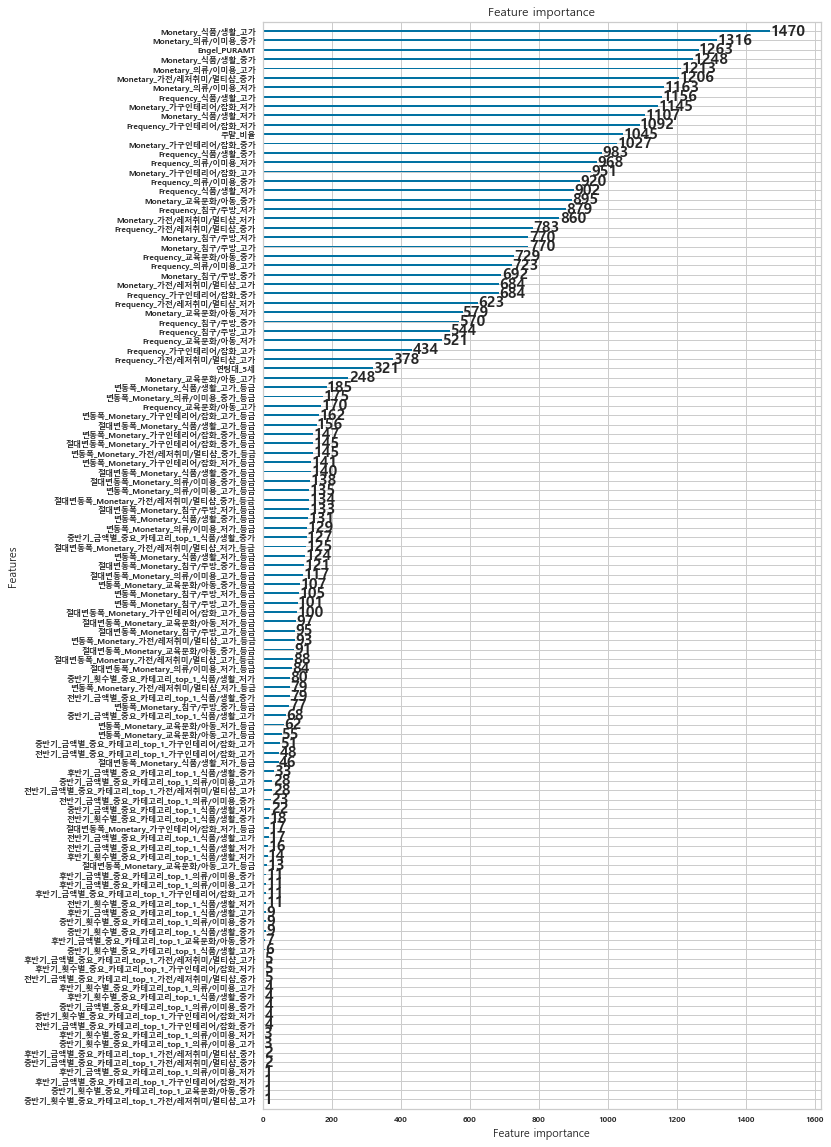

In [294]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
plt.rc('font', size=15, weight="bold")
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plot_importance(lgbm_wrapper, ax=ax)

In [334]:
18*3 + 

54

In [295]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75464 entries, 1 to 19337
Columns: 183 entries, 연령대_5세 to Monetary_침구/주방_중가
dtypes: category(109), float64(38), int64(36)
memory usage: 51.0 MB


# 모델 저장_마지막 성별 제거 후 인코딩 제거한 모델

In [296]:
import pickle
import joblib

filename = 'lgbm_wrapper_model_final.pkl'
joblib.dump(lgbm_wrapper, filename)  

['lgbm_wrapper_model_final.pkl']

In [297]:
# 파일 불러오기: 객체가 나올 것

lgbm = joblib.load('최종모델/lgbm_wrapper_model_final.pkl')
lgbm

LGBMClassifier(bagging_fraction=1.0, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=190, n_jobs=-1, num_leaves=200, objective=None,
               random_state=None, reg_alpha=0.7, reg_lambda=0.7, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [298]:
# 입력값 넣어보기 -> 데이터프레임형태로 넣어줘야 함
# 예측

# data = X.iloc[14, :].tolist()
# db_df = pd.DataFrame(columns = X.columns)
# db_df.loc[0] = data
y_pred = lgbm.predict(X_train.loc[100])
y_pred

array([0, 0, 1, 1], dtype=int64)

In [299]:
y_train.loc[100]

100    0
100    1
100    1
100    1
Name: change_label, dtype: int64

## 모델에 5-7분기 데이터 넣어보기_값 비교

In [330]:
db_df_test = pd.DataFrame(columns = ['predict_label'], index = X_test.index)
for cust in X_test.index:
    db_df_test.loc[cust, 'predict_label'] = lgbm.predict(np.array(X_test.loc[cust]).reshape(1, -1))[0]
db_df_test

,predict_label
1,1
2,1
3,0
4,0
6,1
...,...
19333,1
19334,1
19335,1
19336,0


In [332]:
y_test.value_counts()

1    9515
0    9351
Name: change_label, dtype: int64

In [333]:
print('5분기 대비 8분기 증감 예측값')
print(db_df_test['predict_label'].value_counts(),'\n')
print('5분기 대비 8분기 증감 실제값')
print(y_test.value_counts(),'\n')

5분기 대비 8분기 증감 예측값
1    9982
0    8884
Name: predict_label, dtype: int64 

5분기 대비 8분기 증감 실제값
1    9515
0    9351
Name: change_label, dtype: int64 



# 6-8분기 데이터로 9분기 예측

In [311]:
Total_Top_Q6_Q8 = pd.read_csv('생성데이터/RFM/6. 3분기별로 모든 피처 데이터/Total_Top_Q6_Q8.csv', index_col = 0)
Total_Top_Q6_Q8.head()

,연령대_5세,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,전반기_횟수별_중요 카테고리 top_1_식품/생활_고가,...,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
1,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,-7.253501e+04,-24828.571797,-269201.534260,-949535.028305,0.000000,-1.058998e+06,-1.659087e+05,0.000000,3.126565e+05
2,10,0,0,0,0,0,0,0,0,0,...,3.394144e-12,8.122797e+04,-2491.269959,328501.243401,574421.219977,-86539.557675,3.239222e+05,-9.314251e+04,0.000000,-6.608538e+05
3,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,-4.690343e-12,-35067.847606,6687.523932,0.000000,3506.951680,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
4,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,-4.914547e+03,-18056.383394,-16920.037041,-147236.642339,27518.517273,-4.830329e+04,-3.338658e-12,0.000000,2.414681e+04
6,10,0,0,0,0,0,0,0,0,0,...,0.000000e+00,1.158123e+05,11335.769083,175955.370850,-122198.249767,30457.812295,-1.975318e+05,0.000000e+00,2200.441977,-1.734332e-12


In [312]:
int_li = []
float_li = []
cate_li = []
for i in X_train.columns.tolist():
#     print(X_train[i].dtype)
    if X_train[i].dtype == 'int64':
        int_li.append(i)
    elif X_train[i].dtype == 'float64':
        float_li.append(i)
    else:
        cate_li.append(i)
len(cate_li)
Total_Top_Q6_Q8[cate_li] = Total_Top_Q6_Q8[cate_li].astype('category')
Total_Top_Q6_Q8[int_li] = Total_Top_Q6_Q8[int_li].astype('int64')
Total_Top_Q6_Q8[float_li] = Total_Top_Q6_Q8[float_li].astype('float64')

Total_Top_Q6_Q8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18866 entries, 1 to 19337
Columns: 183 entries, 연령대_5세 to Monetary_침구/주방_중가
dtypes: category(109), float64(38), int64(36)
memory usage: 12.8 MB


In [313]:
cust

2

In [315]:
import numpy as np
lgbm.predict(np.array(Total_Top_Q6_Q8.loc[2]).reshape(1,-1))

array([0], dtype=int64)

In [325]:
db_df = pd.DataFrame(columns = ['predict_label'], index = Total_Top_Q6_Q8.index)
for cust in Total_Top_Q6_Q8.index:
    db_df.loc[cust, 'predict_label'] = lgbm.predict(np.array(Total_Top_Q6_Q8.loc[cust]).reshape(1, -1))[0]
db_df

# 입력값 넣어보기 -> 데이터프레임형태로 넣어줘야 함
# 예측
# for cust in Total_Top_Q6_Q8.index:
#     data = X.iloc[14, :].tolist()
#     db_df = pd.DataFrame(columns = X.columns)
#     db_df.loc[0] = data
#     y_pred = lgbm.predict(X_train.loc[100])
#     y_pred

,predict_label
1,1
2,0
3,0
4,1
6,0
...,...
19333,0
19334,1
19335,1
19336,0


In [328]:
db_df['predict_label'].value_counts()

1    11027
0     7839
Name: predict_label, dtype: int64

In [326]:
Total_Top_Q6_Q8_plus_predictlabel = pd.concat([Total_Top_Q6_Q8, db_df], axis = 1)

In [327]:
Total_Top_Q6_Q8_plus_predictlabel.to_csv('Total_Top_Q6_Q8_plus_predictlabel.csv')

# 재시작_6분기별_

## 데이터 불러오기

In [5]:
import pandas as pd
# 1분기-6분기 
real_final_q1_q6 = pd.read_csv('생성데이터/최종/real_final_q1_q6.csv', index_col = 0)

# 2분기-7분기
real_final_q2_q7 = pd.read_csv('생성데이터/최종/real_final_q2_q7.csv', index_col = 0)

# 3분기-8분기
real_final_q3_q8 = pd.read_csv('생성데이터/최종/real_final_q3_q8.csv', index_col = 0)

In [31]:
real_final_q1_q6.fillna(0, inplace=True)
real_final_q2_q7.fillna(0, inplace=True)
real_final_q3_q8.fillna(0, inplace=True)

## 데이터 모델시작

In [32]:
real_final_q3_q8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18866 entries, 1 to 19337
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ENGEL                             18866 non-null  float64
 1   주말 비율                             18866 non-null  float64
 2   Frequency_가구인테리어/잡화_고가            18866 non-null  float64
 3   Frequency_가구인테리어/잡화_저가            18866 non-null  float64
 4   Frequency_가구인테리어/잡화_중가            18866 non-null  float64
 5   Frequency_가전/레저취미/멀티샵_고가          18866 non-null  float64
 6   Frequency_가전/레저취미/멀티샵_저가          18866 non-null  float64
 7   Frequency_가전/레저취미/멀티샵_중가          18866 non-null  float64
 8   Frequency_교육문화/아동_고가              18866 non-null  float64
 9   Frequency_교육문화/아동_저가              18866 non-null  float64
 10  Frequency_교육문화/아동_중가              18866 non-null  float64
 11  Frequency_식품/생활_고가                18866 non-null  float64
 12  Freq

In [33]:
final_clf = clf
final_new_df = final_clf.setup(data=real_final_q1_q6,
                   target='purchase_sum_증감여부',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,4464
1,Target,purchase_sum_증감여부
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18866, 73)"
5,Missing Values,False
6,Numeric Features,72
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
final_model =  final_clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7307,0.8045,0.7233,0.7226,0.7229,0.4609,0.4609,0.2400
gbc,Gradient Boosting Classifier,0.7254,0.7989,0.6994,0.7256,0.7123,0.4499,0.4502,2.8260
rf,Random Forest Classifier,0.7209,0.7937,0.7182,0.7105,0.7143,0.4415,0.4416,0.6940
et,Extra Trees Classifier,0.7185,0.7941,0.6904,0.7190,0.7044,0.4360,0.4363,0.3820
xgboost,Extreme Gradient Boosting,0.7145,0.7883,0.7057,0.7063,0.7060,0.4285,0.4285,1.8440
ada,Ada Boost Classifier,0.7081,0.7770,0.6703,0.7119,0.6905,0.4147,0.4154,0.5920
lda,Linear Discriminant Analysis,0.7056,0.7775,0.6732,0.7069,0.6896,0.4100,0.4104,0.0880
ridge,Ridge Classifier,0.7055,0.0000,0.6732,0.7068,0.6896,0.4098,0.4103,0.0360
lr,Logistic Regression,0.6936,0.7534,0.6657,0.6920,0.6786,0.3861,0.3864,2.6740
knn,K Neighbors Classifier,0.6863,0.7354,0.6594,0.6838,0.6714,0.3715,0.3718,0.9380


In [35]:
final_best_model = final_clf.tune_model(final_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7383,0.8151,0.7301,0.7311,0.7306,0.4762,0.4762
1,0.7211,0.8003,0.7164,0.7116,0.7140,0.4419,0.4419
2,0.7316,0.8052,0.7176,0.7265,0.7220,0.4626,0.4626
3,0.7200,0.7947,0.7196,0.7085,0.7140,0.4398,0.4399
4,0.7356,0.8148,0.7333,0.7254,0.7293,0.4709,0.4709
Mean,0.7293,0.8060,0.7234,0.7206,0.7220,0.4583,0.4583
Std,0.0075,0.0080,0.0069,0.0089,0.0071,0.0149,0.0149


In [36]:
final_clf.evaluate_model(final_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 최종 _ 라이쮸로 다시 돌려보기

In [37]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train = real_final_q1_q6.drop('purchase_sum_증감여부', axis = 1, inplace=False)
y_train = real_final_q1_q6['purchase_sum_증감여부']

X_test = real_final_q2_q7.drop('purchase_sum_증감여부', axis = 1, inplace=False)
y_test = real_final_q2_q7['purchase_sum_증감여부']

print(X_train.shape, X_test.shape)

# 다시 쪼개기
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 4464)

lgbm_wrapper = LGBMClassifier(n_estimators = 270, colsample_bytree = 1.0, importance_type = 'split',
                              learning_rate = 0.05, max_depth = -1, min_child_samples = 66,
                             min_child_weight = 0.001, min_split_gain = 0, n_jobs = -1, num_leaves = 70, objective = None, 
                            reg_alpha = 0.005, reg_lambda = 0.05, silent = 'warn', subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0,
                              feature_fraction = 1, bagging_freq = 1, bagging_fraction = 0.9)

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=200, eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

(18866, 72) (18866, 72)
[1]	training's binary_logloss: 0.680319	valid_1's binary_logloss: 0.682393
[2]	training's binary_logloss: 0.66872	valid_1's binary_logloss: 0.67368
[3]	training's binary_logloss: 0.65793	valid_1's binary_logloss: 0.66531
[4]	training's binary_logloss: 0.647955	valid_1's binary_logloss: 0.658461
[5]	training's binary_logloss: 0.638919	valid_1's binary_logloss: 0.651637
[6]	training's binary_logloss: 0.630294	valid_1's binary_logloss: 0.645615
[7]	training's binary_logloss: 0.622077	valid_1's binary_logloss: 0.639824
[8]	training's binary_logloss: 0.614247	valid_1's binary_logloss: 0.634276
[9]	training's binary_logloss: 0.60689	valid_1's binary_logloss: 0.628993
[10]	training's binary_logloss: 0.600004	valid_1's binary_logloss: 0.624739
[11]	training's binary_logloss: 0.593356	valid_1's binary_logloss: 0.620237
[12]	training's binary_logloss: 0.587039	valid_1's binary_logloss: 0.616187
[13]	training's binary_logloss: 0.581086	valid_1's binary_logloss: 0.612255
[1

[125]	training's binary_logloss: 0.342262	valid_1's binary_logloss: 0.537497
[126]	training's binary_logloss: 0.341153	valid_1's binary_logloss: 0.537466
[127]	training's binary_logloss: 0.340071	valid_1's binary_logloss: 0.537656
[128]	training's binary_logloss: 0.338831	valid_1's binary_logloss: 0.537742
[129]	training's binary_logloss: 0.337633	valid_1's binary_logloss: 0.537962
[130]	training's binary_logloss: 0.336631	valid_1's binary_logloss: 0.537906
[131]	training's binary_logloss: 0.335365	valid_1's binary_logloss: 0.537763
[132]	training's binary_logloss: 0.33431	valid_1's binary_logloss: 0.537968
[133]	training's binary_logloss: 0.333235	valid_1's binary_logloss: 0.537861
[134]	training's binary_logloss: 0.332039	valid_1's binary_logloss: 0.537731
[135]	training's binary_logloss: 0.331047	valid_1's binary_logloss: 0.538042
[136]	training's binary_logloss: 0.329992	valid_1's binary_logloss: 0.538119
[137]	training's binary_logloss: 0.328971	valid_1's binary_logloss: 0.538249


[236]	training's binary_logloss: 0.240257	valid_1's binary_logloss: 0.544346
[237]	training's binary_logloss: 0.239477	valid_1's binary_logloss: 0.544417
[238]	training's binary_logloss: 0.238713	valid_1's binary_logloss: 0.544495
[239]	training's binary_logloss: 0.237896	valid_1's binary_logloss: 0.544391
[240]	training's binary_logloss: 0.237243	valid_1's binary_logloss: 0.544589
[241]	training's binary_logloss: 0.236422	valid_1's binary_logloss: 0.544716
[242]	training's binary_logloss: 0.235741	valid_1's binary_logloss: 0.544885
[243]	training's binary_logloss: 0.235047	valid_1's binary_logloss: 0.544843
[244]	training's binary_logloss: 0.234315	valid_1's binary_logloss: 0.5449
[245]	training's binary_logloss: 0.233549	valid_1's binary_logloss: 0.545089
[246]	training's binary_logloss: 0.23285	valid_1's binary_logloss: 0.545081
[247]	training's binary_logloss: 0.232165	valid_1's binary_logloss: 0.54536
[248]	training's binary_logloss: 0.231382	valid_1's binary_logloss: 0.545495
[24

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, pred_proba)

print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

[[6385 2832]
 [2593 7056]]
정확도: 0.7124, 정밀도: 0.7136, 재현율: 0.7313, F1: 0.7223, AUC:0.7864


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

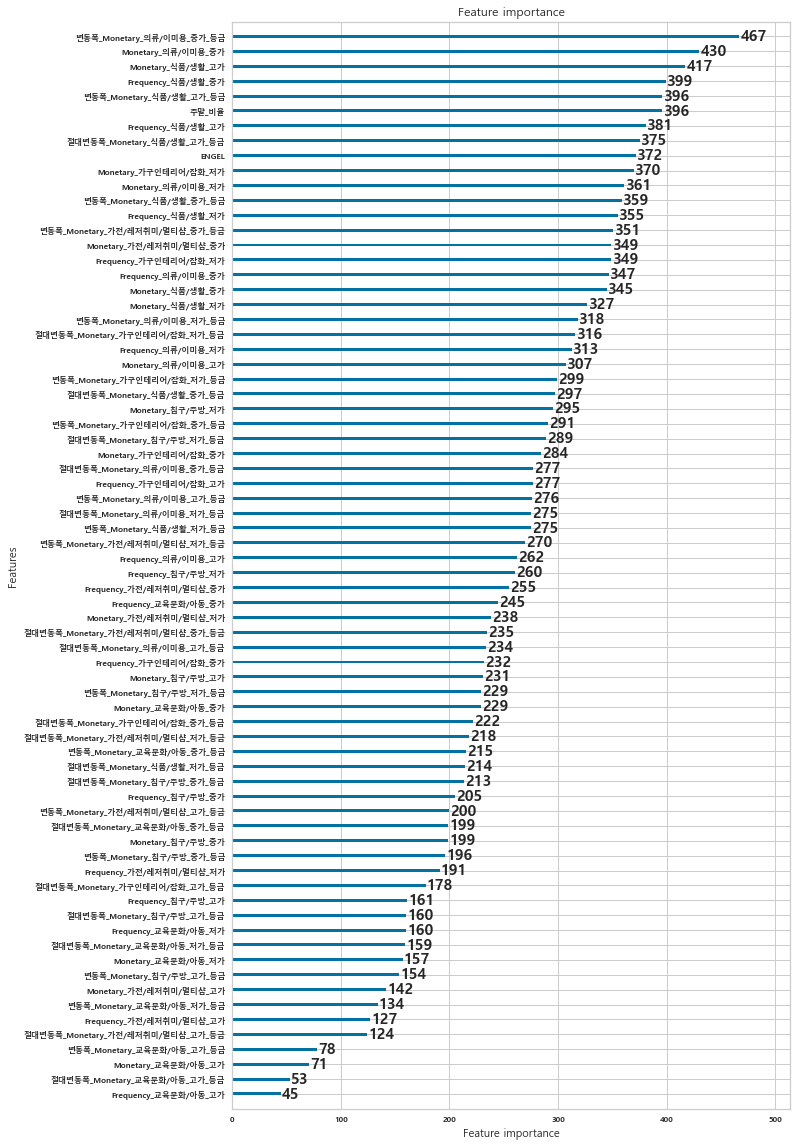

In [39]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
plt.rc('font', size=15, weight="bold")
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plot_importance(lgbm_wrapper, ax=ax)

## 모델저장

In [40]:
import pickle
import joblib

filename = 'lgbm_wrapper_model_realfinal_6Q.pkl'
joblib.dump(lgbm_wrapper, filename)  

['lgbm_wrapper_model_realfinal_6Q.pkl']

In [41]:
# 파일 불러오기: 객체가 나올 것

lgbm = joblib.load('최종모델/lgbm_wrapper_model_realfinal_6Q.pkl')
lgbm

LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=270, n_jobs=-1, num_leaves=80, objective=None,
               random_state=None, reg_alpha=1, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 입력값 넣어보기

In [42]:
import numpy as np 

# 2-7분기 대비 8분기 증감여부
db_df_test = pd.DataFrame(columns = ['predict_label'], index = X_test.index)
for cust in X_test.index:
    db_df_test.loc[cust, 'predict_label'] = lgbm.predict(np.array(X_test.loc[cust]).reshape(1, -1))[0]
db_df_test

,predict_label
CUSTNO,
1,1
2,0
3,1
4,1
6,0
...,...
19333,1
19334,1
19335,1


In [43]:
print('2-7분기 대비 2분기에서 8분기 증감 예측값')
print(db_df_test['predict_label'].value_counts(),'\n')
print('2-7분기 대비 2분기에서 8분기 증감 실제값')
print(y_test.value_counts(),'\n')

2-7분기 대비 2분기에서 8분기 증감 예측값
1    9982
0    8884
Name: predict_label, dtype: int64 

2-7분기 대비 2분기에서 8분기 증감 실제값
1    9649
0    9217
Name: purchase_sum_증감여부, dtype: int64 



# 최종 라벨 만들기_3-8분기 대비 9분기 증감 여부

In [44]:
db_df = pd.DataFrame(columns = ['predict_label'], index = real_final_q3_q8.index)
for cust in real_final_q3_q8.index:
    db_df.loc[cust, 'predict_label'] = lgbm.predict(np.array(real_final_q3_q8.loc[cust]).reshape(1, -1))[0]
db_df

,predict_label
CUSTNO,
1,1
2,1
3,1
4,1
6,0
...,...
19333,1
19334,1
19335,1


In [45]:
Total_Top_Q3_Q8_plus_predictlabel = pd.concat([real_final_q3_q8, db_df], axis = 1)
Total_Top_Q3_Q8_plus_predictlabel

,ENGEL,주말 비율,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,...,절대변동폭_Monetary_식품/생활_고가_등급,절대변동폭_Monetary_식품/생활_저가_등급,절대변동폭_Monetary_식품/생활_중가_등급,절대변동폭_Monetary_의류/이미용_고가_등급,절대변동폭_Monetary_의류/이미용_저가_등급,절대변동폭_Monetary_의류/이미용_중가_등급,절대변동폭_Monetary_침구/주방_고가_등급,절대변동폭_Monetary_침구/주방_저가_등급,절대변동폭_Monetary_침구/주방_중가_등급,predict_label
CUSTNO,,,,,,,,,,,,,,,,,,,,,
1,11.121356,0.223443,-0.158102,-0.705760,-0.089605,-0.050194,0.000000,-0.223669,0.000000,0.000000,...,5.2,0.0,10.0,7.8,2.3,4.0,17.2,9.4,16.6,1
2,12.718560,0.268983,-0.212057,1.173678,-0.098327,-0.787160,-0.259668,0.000000,0.000000,0.000000,...,9.2,5.1,8.3,7.5,8.3,6.5,24.4,0.0,25.7,1
3,88.712385,0.207592,0.000000,-5.370023,0.000000,0.000000,-0.055062,0.000000,0.000000,0.000000,...,4.2,3.8,0.0,0.0,1.5,0.0,0.0,1.1,0.0,1
4,35.580152,0.207576,0.000000,0.392258,0.111622,-0.468059,0.082593,-0.068111,0.000000,0.030618,...,4.2,2.7,4.8,5.4,5.5,4.0,7.7,6.9,6.5,1
6,34.899676,0.235732,0.186061,0.090496,0.199882,0.133551,0.279228,0.000000,0.000000,0.245313,...,9.6,3.8,6.7,0.0,2.6,3.9,9.8,9.4,10.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,99.903127,0.305709,0.000000,-0.372339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,7.7,0.0,0.0,0.0,0.0,0.0,0.0,1
19334,73.370821,0.217228,0.000000,-0.926857,0.000000,0.000000,-0.025964,0.000000,-0.130275,-2.357809,...,4.0,10.7,6.2,0.0,2.8,5.8,0.0,13.0,0.0,1
19335,42.901577,0.186784,0.000000,-1.702876,0.024436,0.000000,0.936766,-0.133531,0.295356,-1.435030,...,6.0,0.0,5.3,5.0,6.5,2.5,0.0,15.6,4.7,1


In [46]:
Total_Top_Q3_Q8_plus_predictlabel['predict_label'].value_counts()

1    10446
0     8420
Name: predict_label, dtype: int64

In [47]:
Total_Top_Q3_Q8_plus_predictlabel.to_csv('Total_Top_Q3_Q8_plus_predictlabel.csv')